### Bidiretional LSTM for Time Series Forecasting

Libs required:

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,4)

import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go

from keras.preprocessing import sequence
from keras.layers import Dense, LSTM, Bidirectional
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.metrics import mean_squared_error, mean_absolute_error
from plotly.offline import init_notebook_mode, iplot

In [2]:
init_notebook_mode(connected=True)

#### Reading the data numerically:

In [3]:
features_train = pd.read_csv('./dataset/X_treino_.csv', index_col=['data'])
et0_train = pd.read_csv('./dataset/y_treino_.csv', index_col=['data'])

features_val = pd.read_csv('./dataset/X_val.csv', index_col=['data'])
et0_val = pd.read_csv('./dataset/y_val.csv', index_col=['data'])

In [4]:
data_train = pd.concat([features_train, et0_train], axis=1)
data_val = pd.concat([features_val, et0_val], axis=1)

In [5]:
BATCH_SIZE = 32
N_INPUT = len(features_train)
N_FEATURES = len(features_train.columns)

In [6]:
trace0 = go.Scatter(
    x = data_train.index,
    y = data_train['et0'],
    name = 'Train'
)

trace1 = go.Scatter(
    x = data_val.index,
    y = data_val['et0'],
    name = 'Validation'
)

data = [trace0, trace1]

iplot(data)

In [8]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [9]:
X, y = split_sequence(data_train['et0'].values, 5)

In [10]:
n_features = 1
n_steps = 5

In [11]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

model = Sequential()
model.add(Bidirectional(LSTM(50,
                             dropout=0.2,
                             recurrent_dropout=0.2, 
                             activation='relu', 
                             input_shape=(n_steps, n_features))))
model.add(Dense(1))

model.compile(optimizer='adam', 
              loss='mean_absolute_error', 
              metrics=[mean_absolute_error, mean_squared_error])

# Stacking more layers
# model.add(Bidirectional(LSTM(32, 
#                              dropout=0.2, 
#                              recurrent_dropout=0.2, 
#                              return_sequences=True))) activation='relu'

#else:
#    model.add(Bidirectional(LSTM(32, activation='relu', input_shape=(N_INPUT, N_FEATURES))))
# input_shape=(None, float_data.shape[-1]

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.fit(X, y, epochs=40, verbose=1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
208/208 [==============================] - 5s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_squared_error: 5.5341e-04
Epoch 2/40
208/208 [==============================] - 0s 298us/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_squared_error: 2.4924e-04
Epoch 3/40
208/208 [==============================] - 0s 332us/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_squared_error: 2.1481e-04
Epoch 4/40
208/208 [==============================] - 0s 336us/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_squared_error: 2.3246e-04
Epoch 5/40
208/208 [==============================] - 0s 330us/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_squared_error: 2.1612e-04
Epoch 6/40
208/208 [==============================] - 0s 332us/step - loss: 0.0112 - mean_absolute_error: 0.

In [13]:
X_val, y_val = split_sequence(data_val['et0'].values, 5)

In [14]:
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))

In [15]:
y_pred = model.predict(X_val, verbose=1)

49/49 [==============================] - 1s 19ms/step


In [27]:
y_pred = np.array([val for sublist in y_pred for val in sublist])

In [28]:
mae = mean_absolute_error(y_val, y_pred)
mae

<tf.Tensor 'Mean:0' shape=() dtype=float64>

In [30]:
mse = mean_squared_error(y_val, y_pred)

In [45]:
mse.

0

In [46]:
mse.value_index

0

In [48]:
import sklearn

ImportError: DLL load failed: Não foi possível encontrar o procedimento especificado.

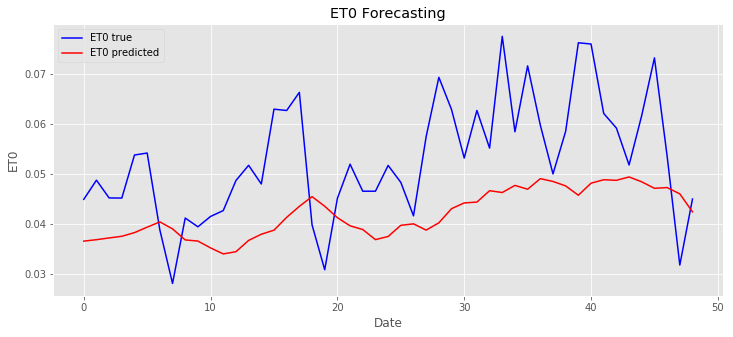

In [34]:
plt.figure(figsize=(12,5))  
plt.plot(y_val, color='blue', label='ET0 true')  
plt.plot(y_pred, color='red', label='ET0 predicted')  
plt.title('ET0 Forecasting')  
plt.xlabel('Date')  
plt.ylabel('ET0')  
plt.legend()
#plt.savefig("eto.png")
plt.show()

There are many other things you could try, in order to improve performance on the temperature-forecasting problem:
- Adjust the number of units in each recurrent layer in the stacked setup. The current choices are largely arbitrary and thus probably suboptimal.
- Adjust the learning rate used by the RMSprop optimizer. Change the optimizer to Adam.
- Try using LSTM layers instead of GRU layers (vice-versa).
- Try using a bigger densely connected regressor on top of the recurrent layers: that is, a bigger Dense layer or even a stack of Dense layers.
- Don’t forget to eventually run the best-performing models (in terms of validation MAE ) on the test set! Otherwise, you’ll develop architectures that are overfitting to the validation set.

In [26]:
model.save('./saved_models/bi_lstm_50units_40epochs.h5')

In [122]:
model.evaluate_generator(test_gen,steps=test_steps)

[1.6325380717005049, 1.6325380717005049, 4.1739006723676413]

In [123]:
np.sqrt(4.1739006723676413)

2.0430126461594997

* MAE  = 1.6325380717005049

* RMSE = 2.0430126461594997